In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [125]:
# Load the data
data = pd.read_csv('Data2/train.csv')

In [126]:
test_data = pd.read_csv('Data2/test.csv')

In [127]:
data.head(6)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000


In [128]:
data.tail(6)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [129]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [131]:
# coloanele care nu sunt obiecte
print(data.dtypes[data.dtypes != 'object'])

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object


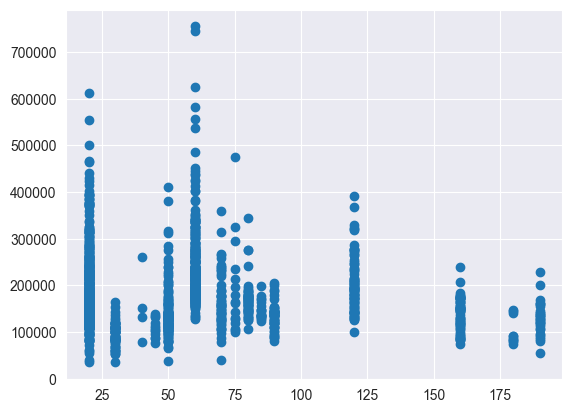

In [132]:
plt.scatter(data['MSSubClass'], data['SalePrice'])

In [133]:
data.query('MSSubClass > 60 and SalePrice > 400000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000


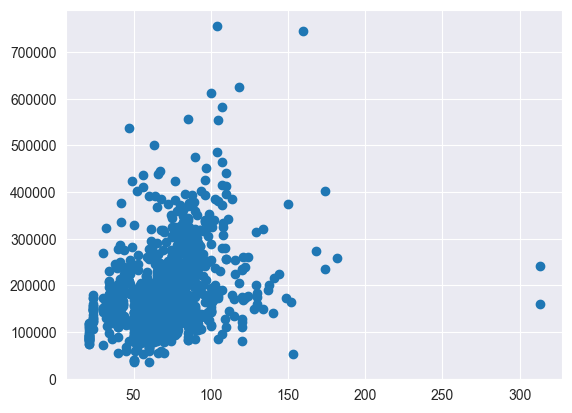

In [134]:
plt.scatter(data['LotFrontage'], data['SalePrice'])

In [135]:
data.query('SalePrice > 700000')
# 935 si 1299
outliers = set()
outliers.add(935)
outliers.add(1299)
outliers

{935, 1299}

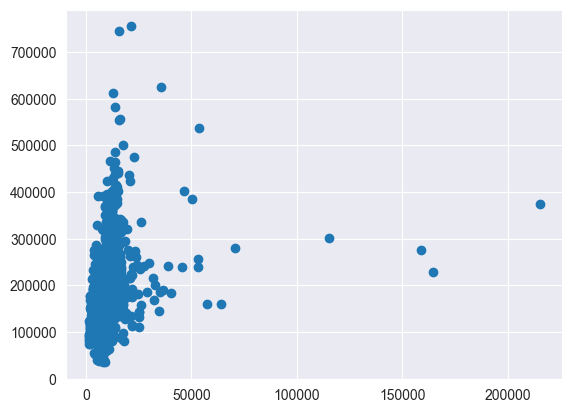

In [136]:
plt.scatter(data['LotArea'], data['SalePrice'])

In [137]:
data.query('LotArea > 100000')
# 250, 314, 336, 707
outliers.add(250)
outliers.add(314)
outliers.add(336)
outliers.add(707)
outliers

{250, 314, 336, 707, 935, 1299}

In [138]:
stats.zscore(data['LotArea']).sort_values().tail(10)

384      4.268474
457      4.280500
769      4.308262
1396     4.678682
1298     5.348867
451      6.037793
706     10.486449
249     14.881285
335     15.448542
313     20.518273
Name: LotArea, dtype: float64

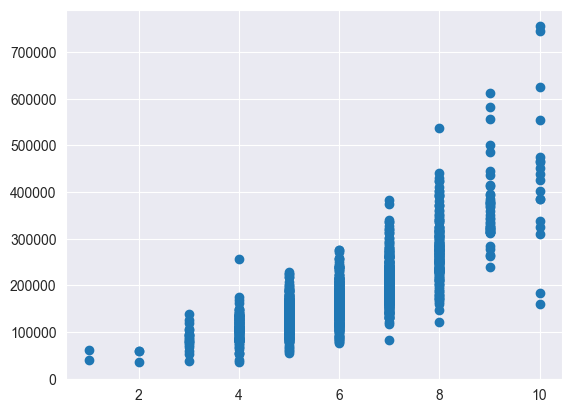

In [139]:
plt.scatter(data['OverallQual'], data['SalePrice'])

In [140]:
data.query('OverallQual == 10 and SalePrice < 200000')
# 524 si 1299
outliers.add(524)
outliers.add(1299)
outliers


{250, 314, 336, 524, 707, 935, 1299}

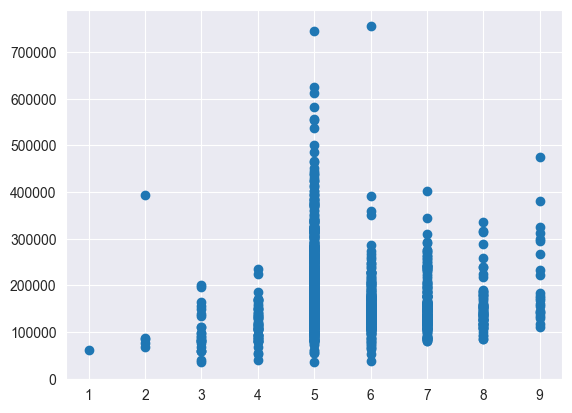

In [141]:
plt.scatter(data['OverallCond'], data['SalePrice'])

In [142]:
data.query('OverallCond == 2 and SalePrice > 300000')
outliers

{250, 314, 336, 524, 707, 935, 1299}

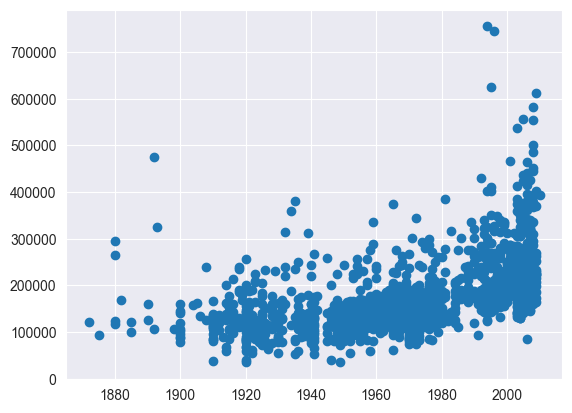

In [143]:
plt.scatter(data['YearBuilt'], data['SalePrice'])

In [144]:
data.query('YearBuilt > 1980 and SalePrice > 700000')
# 186, 692, 1183
outliers.add(186)
outliers.add(692)
outliers.add(1183)
outliers

{186, 250, 314, 336, 524, 692, 707, 935, 1183, 1299}

In [145]:
for id_outlier in outliers:
    # stergem din data outlier-ul cu id-ul id_outlier
    data = data.drop(data[data['Id'] == id_outlier].index)

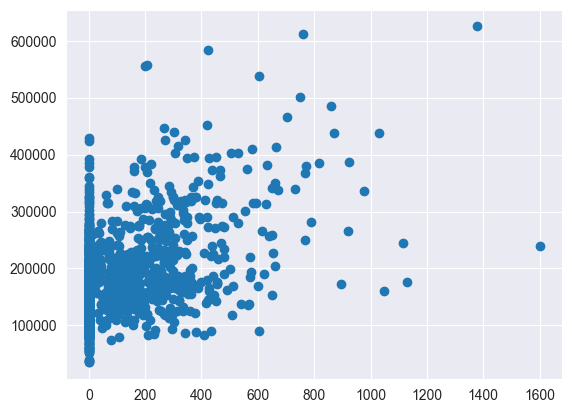

In [146]:
plt.scatter(data['MasVnrArea'], data['SalePrice'])

In [147]:
data.query('MasVnrArea > 1200')
# 297 si 1170
outliers.add(297)
outliers.add(1170)

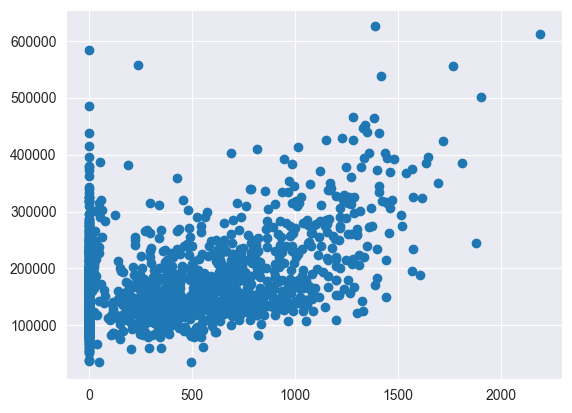

In [148]:
plt.scatter(data['BsmtFinSF1'], data['SalePrice'])

In [149]:
data.query('BsmtFinSF1 == 0 and SalePrice > 500000')
# 804
outliers.add(804)

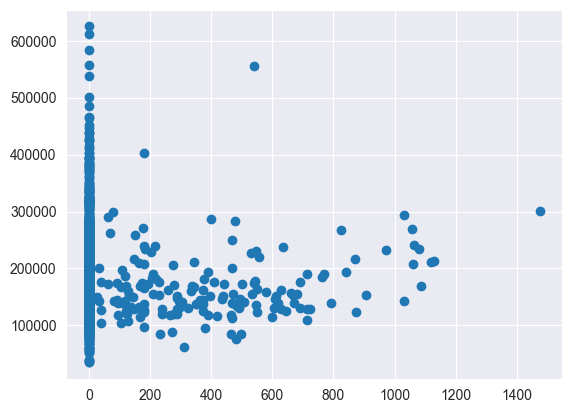

In [150]:
plt.scatter(data['BsmtFinSF2'], data['SalePrice'])

In [151]:
data.query('BsmtFinSF2 > 1200')
# 322
outliers.add(322)

In [152]:
data.query('BsmtFinSF2 > 400 and SalePrice > 500000')
# 441 
outliers.add(441)

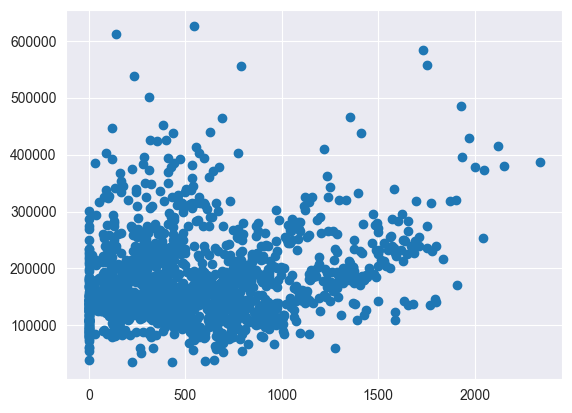

In [153]:
plt.scatter(data['BsmtUnfSF'], data['SalePrice'])

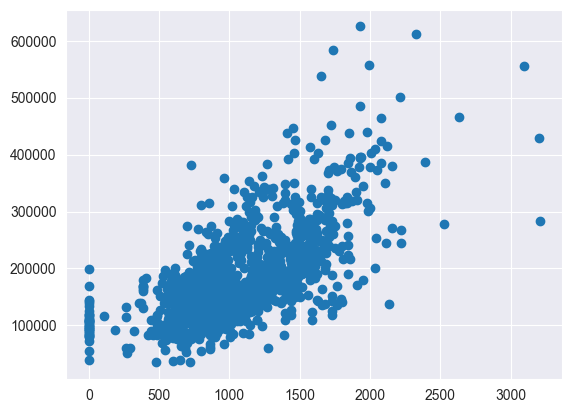

In [154]:
plt.scatter(data['TotalBsmtSF'], data['SalePrice'])

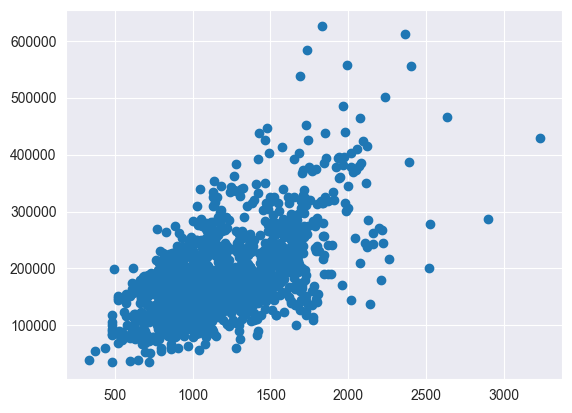

In [155]:
plt.scatter(data['1stFlrSF'], data['SalePrice'])

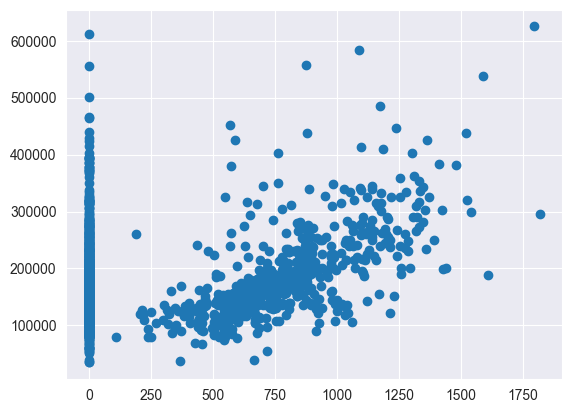

In [156]:
plt.scatter(data['2ndFlrSF'], data['SalePrice'])

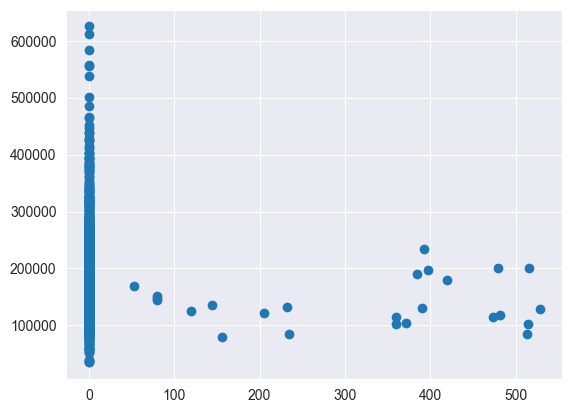

In [157]:
plt.scatter(data['LowQualFinSF'], data['SalePrice'])

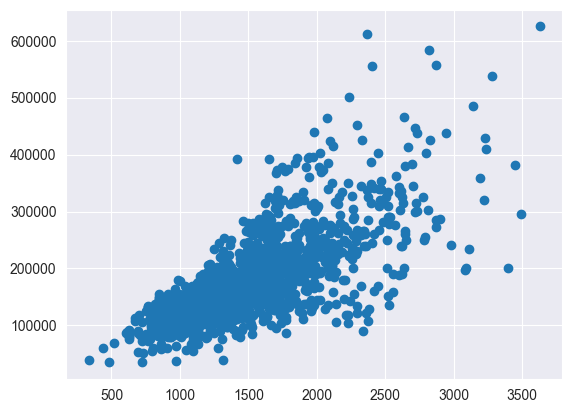

In [158]:
plt.scatter(data['GrLivArea'], data['SalePrice'])

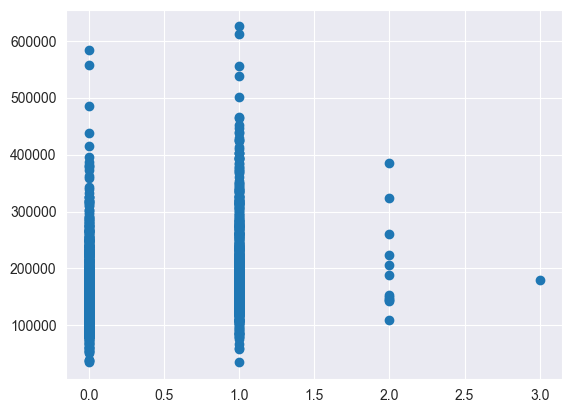

In [159]:
plt.scatter(data['BsmtFullBath'], data['SalePrice'])

In [160]:
data.query('BsmtFullBath == 3 and SalePrice < 200000')
# 739
outliers.add(739)

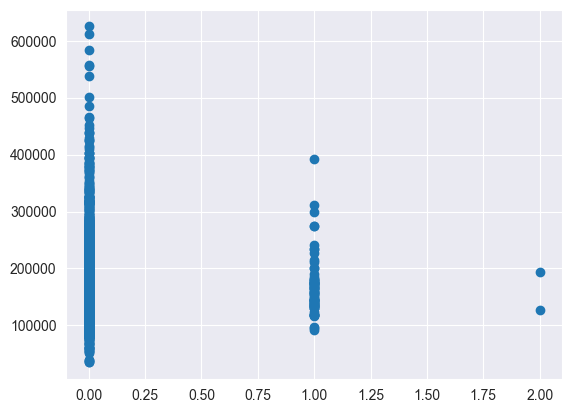

In [161]:
plt.scatter(data['BsmtHalfBath'], data['SalePrice'])

In [162]:
stats.zscore(data['BsmtHalfBath']).sort_values().tail(10)

1123    3.982807
1287    3.982807
426     3.982807
245     3.982807
1006    3.982807
944     3.982807
1118    3.982807
330     3.982807
954     8.204350
597     8.204350
Name: BsmtHalfBath, dtype: float64

In [163]:
# 954 597
outliers.add(955)
outliers.add(598)

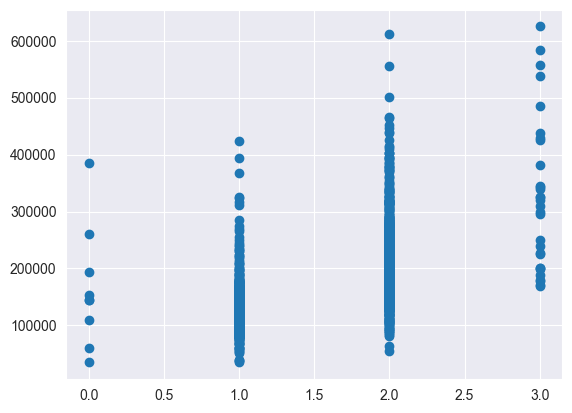

In [164]:
plt.scatter(data['FullBath'], data['SalePrice'])

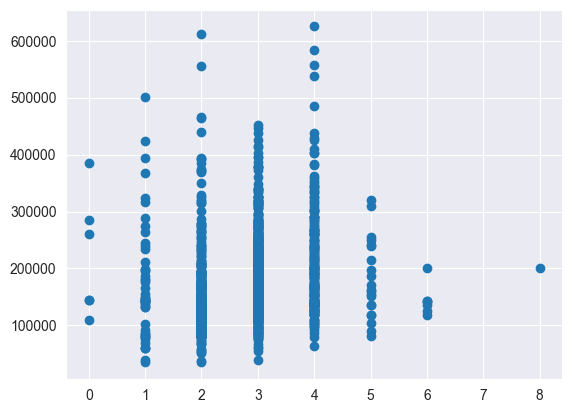

In [165]:
plt.scatter(data['BedroomAbvGr'], data['SalePrice'])

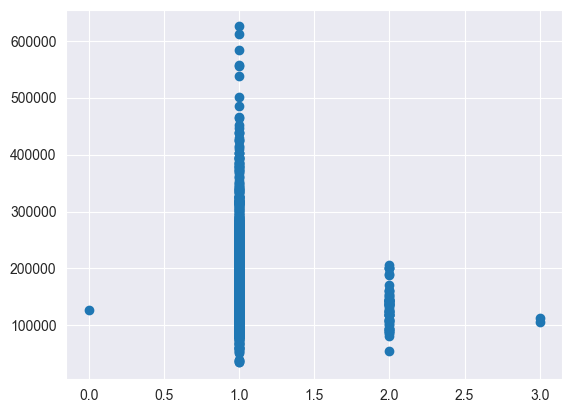

In [166]:
plt.scatter(data['KitchenAbvGr'], data['SalePrice'])

In [167]:
stats.zscore(data['KitchenAbvGr']).sort_values().tail(10)

1186    4.312942
1030    4.312942
1283    4.312942
330     4.312942
165     4.312942
137     4.312942
93      4.312942
529     4.312942
809     8.838097
48      8.838097
Name: KitchenAbvGr, dtype: float64

In [168]:
data.query('KitchenAbvGr == 3 and SalePrice < 200000 or KitchenAbvGr == 0')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
48,49,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
809,810,75,RM,90.0,8100,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,11,2009,WD,Normal,106000
954,955,90,RL,35.0,9400,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,AdjLand,127500


In [169]:
# 49 810
outliers.add(49)
outliers.add(810)
outliers

{49,
 186,
 250,
 297,
 314,
 322,
 336,
 441,
 524,
 598,
 692,
 707,
 739,
 804,
 810,
 935,
 955,
 1170,
 1183,
 1299}

In [170]:
for id_outlier in outliers:
    data = data.drop(data[data['Id'] == id_outlier].index)
    test_data = test_data.drop(test_data[test_data['Id'] == id_outlier].index)

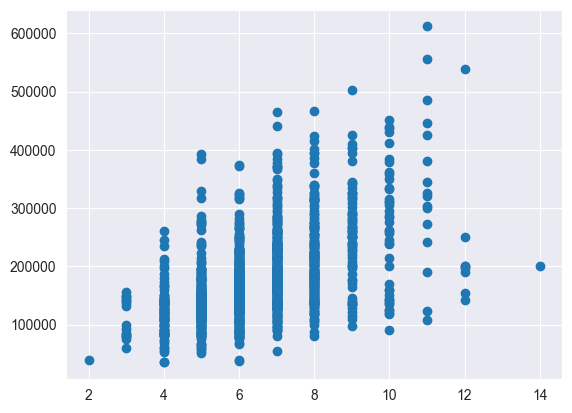

In [171]:
plt.scatter(data['TotRmsAbvGrd'], data['SalePrice'])

In [172]:
data.query('TotRmsAbvGrd == 14')
outliers.add(636)
data.drop(data[data['Id'] == 636].index, inplace=True)
test_data.drop(test_data[test_data['Id'] == 636].index, inplace=True)

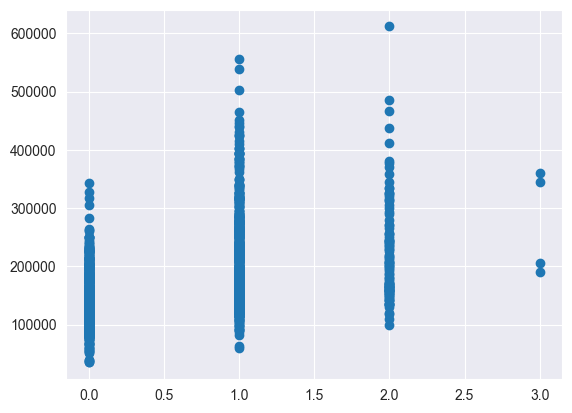

In [173]:
plt.scatter(data['Fireplaces'], data['SalePrice'])

In [174]:
stats.zscore(data['Fireplaces']).sort_values().tail(10)

817     2.194159
1286    2.194159
510     2.194159
319     2.194159
1301    2.194159
70      2.194159
309     3.766568
605     3.766568
166     3.766568
642     3.766568
Name: Fireplaces, dtype: float64

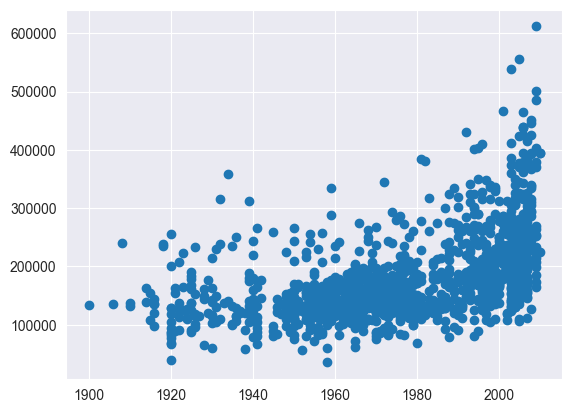

In [175]:
plt.scatter(data['GarageYrBlt'], data['SalePrice'])

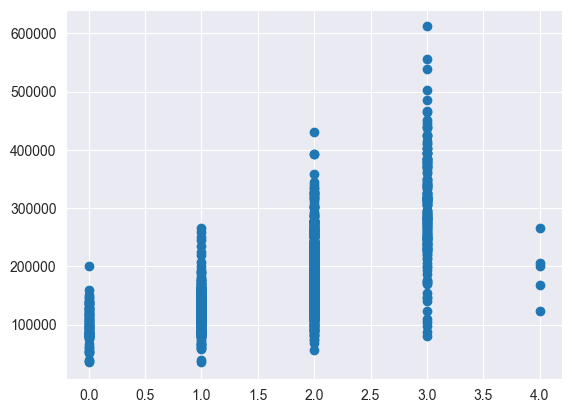

In [176]:
plt.scatter(data['GarageCars'], data['SalePrice'])

In [177]:
stats.zscore(data['GarageCars']).sort_values().tail(10)

238     1.670992
261     1.670992
639     1.670992
1247    1.670992
644     1.670992
1190    3.022626
420     3.022626
1350    3.022626
1340    3.022626
747     3.022626
Name: GarageCars, dtype: float64

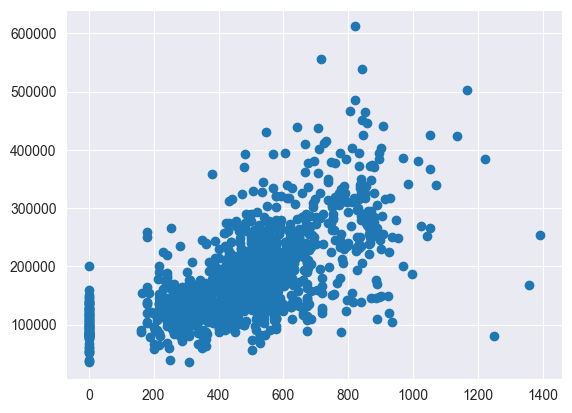

In [178]:
plt.scatter(data['GarageArea'], data['SalePrice'])

In [179]:
data.query('GarageArea > 1200 and SalePrice < 300000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
581,582,20,RL,98.0,12704,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,New,Partial,253293
1061,1062,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,...,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal,81000
1190,1191,190,RL,NaN,32463,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,168000


In [180]:
# 582, 1062, 1191
outliers.add(582)
outliers.add(1062)
outliers.add(1191)
data.drop(data[data['Id'] == 582].index, inplace=True)
data.drop(data[data['Id'] == 1062].index, inplace=True)
data.drop(data[data['Id'] == 1191].index, inplace=True)
test_data.drop(test_data[test_data['Id'] == 582].index, inplace=True)
test_data.drop(test_data[test_data['Id'] == 1062].index, inplace=True)
test_data.drop(test_data[test_data['Id'] == 1191].index, inplace=True)
outliers

{49,
 186,
 250,
 297,
 314,
 322,
 336,
 441,
 524,
 582,
 598,
 636,
 692,
 707,
 739,
 804,
 810,
 935,
 955,
 1062,
 1170,
 1183,
 1191,
 1299}

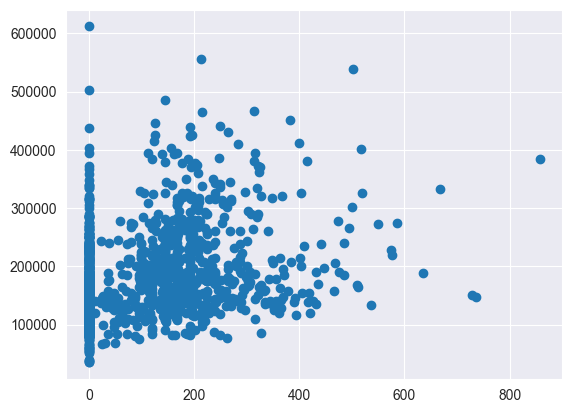

In [181]:
plt.scatter(data['WoodDeckSF'], data['SalePrice'])

In [182]:
stats.zscore(data['WoodDeckSF']).sort_values().tail(10)

357     3.571896
961     3.684852
169     3.878491
64      3.894627
1423    3.975310
1210    4.370656
1313    4.636910
1068    5.121007
1459    5.185553
53      6.161816
Name: WoodDeckSF, dtype: float64

In [183]:
data.query('WoodDeckSF > 700')
# 54, 1069, 1160
outliers.add(54)
outliers.add(1069)
outliers.add(1160)
data.drop(data[data['Id'] == 54].index, inplace=True)
data.drop(data[data['Id'] == 1069].index, inplace=True)
data.drop(data[data['Id'] == 1160].index, inplace=True)
test_data.drop(test_data[test_data['Id'] == 54].index, inplace=True)
test_data.drop(test_data[test_data['Id'] == 1069].index, inplace=True)
test_data.drop(test_data[test_data['Id'] == 1160].index, inplace=True)
outliers


{49,
 54,
 186,
 250,
 297,
 314,
 322,
 336,
 441,
 524,
 582,
 598,
 636,
 692,
 707,
 739,
 804,
 810,
 935,
 955,
 1062,
 1069,
 1160,
 1170,
 1183,
 1191,
 1299}

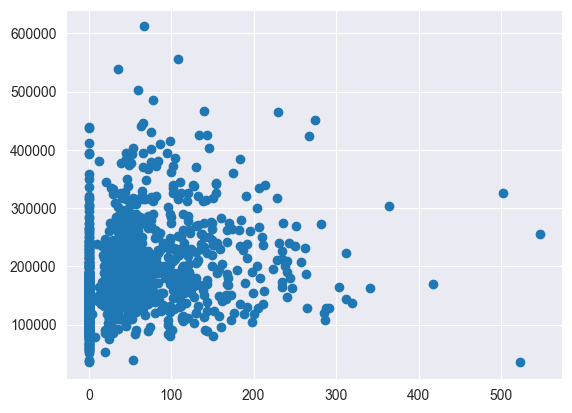

In [184]:
plt.scatter(data['OpenPorchSF'], data['SalePrice'])

In [185]:
# 496, 584, 1329
outliers.add(496)
outliers.add(584)
outliers.add(1329)
data.drop(data[data['Id'] == 496].index, inplace=True)
data.drop(data[data['Id'] == 584].index, inplace=True)
data.drop(data[data['Id'] == 1329].index, inplace=True)
test_data.drop(test_data[test_data['Id'] == 496].index, inplace=True)
test_data.drop(test_data[test_data['Id'] == 584].index, inplace=True)
test_data.drop(test_data[test_data['Id'] == 1329].index, inplace=True)

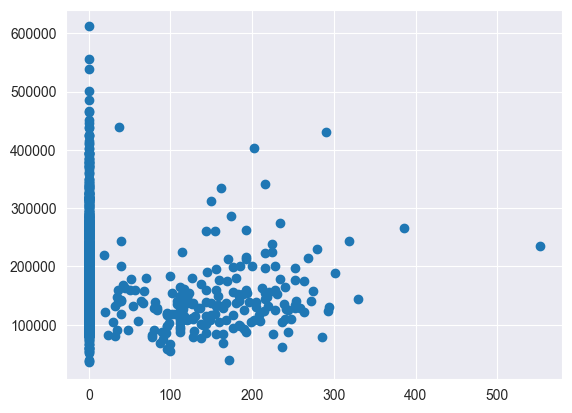

In [186]:
plt.scatter(data['EnclosedPorch'], data['SalePrice'])

In [187]:
data.query('EnclosedPorch > 500')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000


In [188]:
# 198
outliers.add(198)
data.drop(data[data['Id'] == 198].index, inplace=True)
test_data.drop(test_data[test_data['Id'] == 198].index, inplace=True)

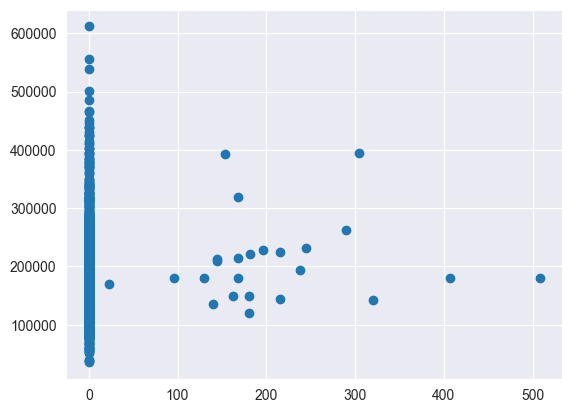

In [189]:
plt.scatter(data['3SsnPorch'], data['SalePrice'])

In [190]:
data.query(' 3SsnPorch > 500 ')

SyntaxError: invalid syntax (<unknown>, line 1)

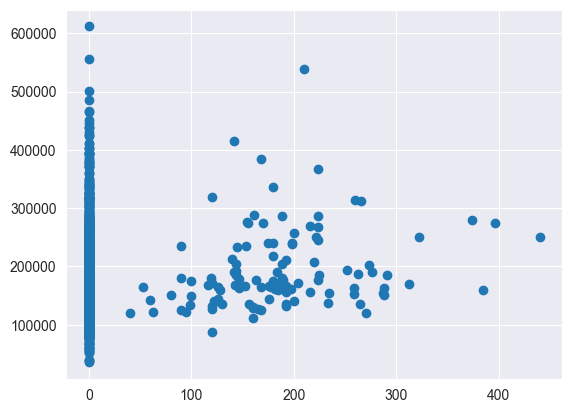

In [191]:
plt.scatter(data['ScreenPorch'], data['SalePrice'])

In [192]:
print(outliers)

{1160, 524, 1170, 1299, 1183, 804, 1062, 935, 1191, 297, 810, 1069, 49, 1329, 692, 54, 441, 186, 314, 955, 322, 707, 582, 198, 584, 336, 598, 739, 496, 250, 636}


In [193]:
# luam coloanele numerice intr o lista
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
for i in ['Id', 'SalePrice', 'MiscVal', 'PoolArea', 'MoSold', 'YrSold']:
    numeric_cols.remove(i)

In [194]:
data_zscore = pd.read_csv('Data2/train.csv')
zscore_outliers = set()

for col in numeric_cols:
    # Calculează z-score pentru fiecare coloană numerică
    z_scores = np.abs(stats.zscore(data_zscore[col]))
    
    # Selectează rândurile unde z-score este mai mare de 6 și adaugă `Id`-urile în setul de outlieri
    outlier_ids = data_zscore[z_scores > 7]['Id']
    zscore_outliers.update(outlier_ids)

print(zscore_outliers)

{259, 6, 264, 1032, 1162, 268, 1299, 1174, 407, 1438, 1441, 810, 171, 49, 1329, 52, 56, 1081, 186, 314, 955, 707, 323, 1347, 198, 199, 206, 336, 598, 89, 730, 1387, 238, 496, 1010, 884, 250, 636}


In [195]:
pd.DataFrame(data.isnull().sum().sort_values(ascending=False).head(20))

,0
PoolQC,1425
MiscFeature,1379
Alley,1340
Fence,1156
MasVnrType,855
FireplaceQu,682
LotFrontage,255
GarageYrBlt,76
GarageCond,76
GarageType,76


In [196]:
data['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [197]:
data['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

C:\Users\david\AppData\Local\Temp\ipykernel_20156\99700245.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Alley'].fillna('NoAlley', inplace=True)
C:\Users\david\AppData\Local\Temp\ipykernel_20156\99700245.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

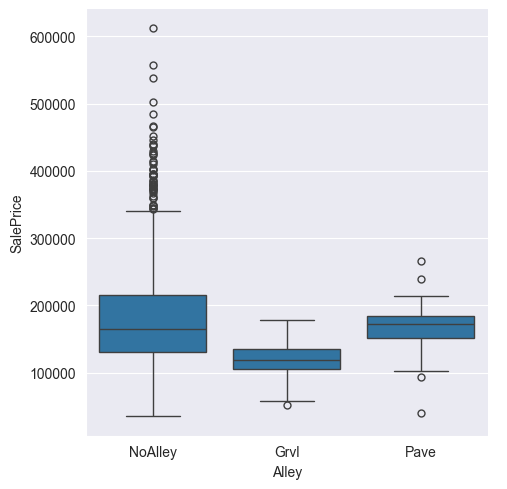

In [198]:
data['Alley'].fillna('NoAlley', inplace=True)
test_data['Alley'].fillna('NoAlley', inplace=True)
sns.catplot(x='Alley', y='SalePrice', data=data, kind='box')

In [199]:
data['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

C:\Users\david\AppData\Local\Temp\ipykernel_20156\1545975047.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Fence'].fillna('NoFence', inplace=True)
C:\Users\david\AppData\Local\Temp\ipykernel_20156\1545975047.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

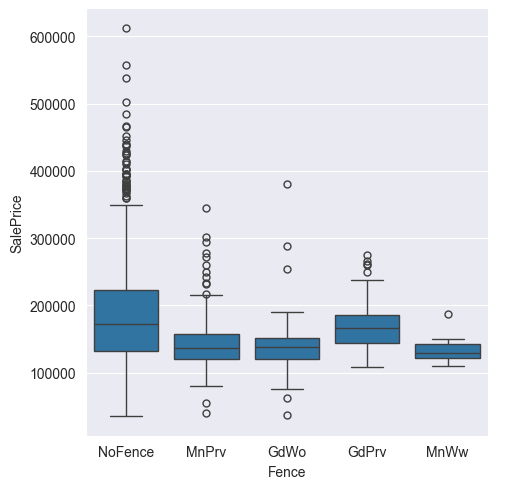

In [200]:
data['Fence'].fillna('NoFence', inplace=True)
test_data['Fence'].fillna('NoFence', inplace=True)
sns.catplot(x='Fence', y='SalePrice', data=data, kind='box')

In [201]:
data['MasVnrType'].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

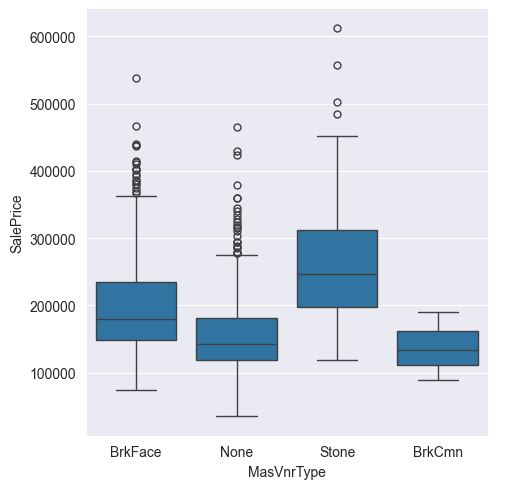

In [202]:
data.fillna({'MasVnrType' : 'None'}, inplace=True)
test_data.fillna({'MasVnrType' : 'None'}, inplace=True)
sns.catplot(x='MasVnrType', y='SalePrice', data=data, kind='box')

In [203]:
data['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

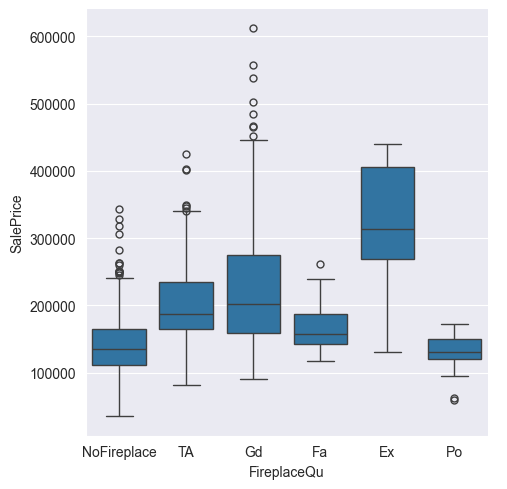

In [204]:
data.fillna({'FireplaceQu' : 'NoFireplace'}, inplace=True)
test_data.fillna({'FireplaceQu' : 'NoFireplace'}, inplace=True)
sns.catplot(x='FireplaceQu', y='SalePrice', data=data, kind='box')

In [205]:
data['MasVnrArea'].fillna(0, inplace=True) 
test_data['MasVnrArea'].fillna(0, inplace=True)

C:\Users\david\AppData\Local\Temp\ipykernel_20156\3649859277.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['MasVnrArea'].fillna(0, inplace=True)
C:\Users\david\AppData\Local\Temp\ipykernel_20156\3649859277.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [206]:
data['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  52., 100.,  24.,  89.,  63.,  76.,  81.,
        95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,  77.,
        64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,  92.,
       134.,  62.,  86., 141.,  97.,  54.,  41.,  79.,  99.,  67.,  83.,
        43., 103., 174.,  93.,  30., 129., 140.,  35.,  37., 118.,  87.,
       116., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,  38., 109.,
       130.,  53., 137.,  45., 106.,  42.,  39., 104., 144., 114., 128.,
       149., 168., 182., 138., 152., 124., 153.,  46.])

In [207]:
data.fillna({'LotFrontage' : 0}, inplace=True)
test_data.fillna({'LotFrontage' : 0}, inplace=True)

In [208]:
corelation = data['GarageYrBlt'].corr(data['YearBuilt'])
corelation
# drop GarageYrBlt

0.8303658139797756

In [209]:
data["GarageCond"].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

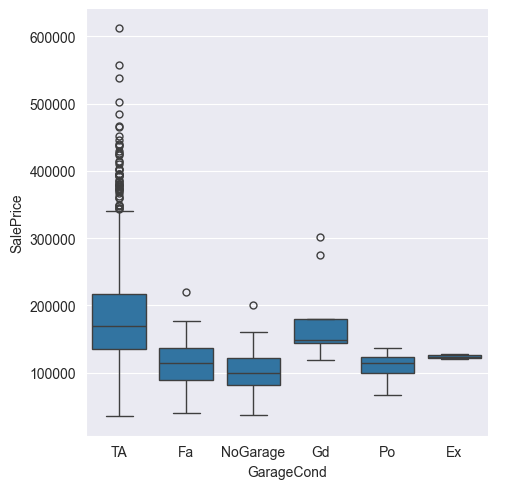

In [210]:
data.fillna({'GarageCond' : 'NoGarage'}, inplace=True)
test_data.fillna({'GarageCond' : 'NoGarage'}, inplace=True)
sns.catplot(x='GarageCond', y='SalePrice', data=data, kind='box')

In [211]:
data["GarageType"].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

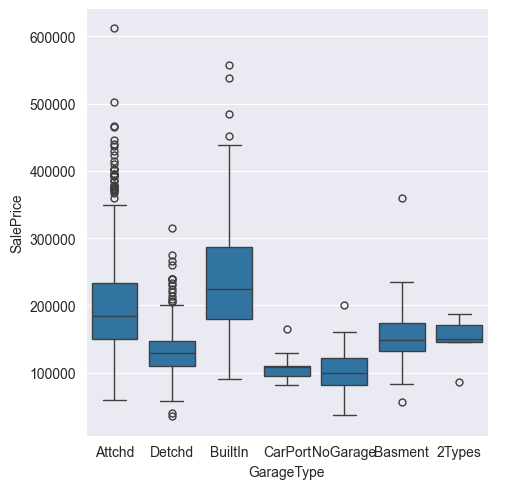

In [212]:
data.fillna({'GarageType' : 'NoGarage'}, inplace=True)
test_data.fillna({'GarageType' : 'NoGarage'}, inplace=True)
sns.catplot(x='GarageType', y='SalePrice', data=data, kind='box')

In [213]:
data["GarageFinish"].unique()


array(['RFn', 'Unf', 'Fin', nan], dtype=object)

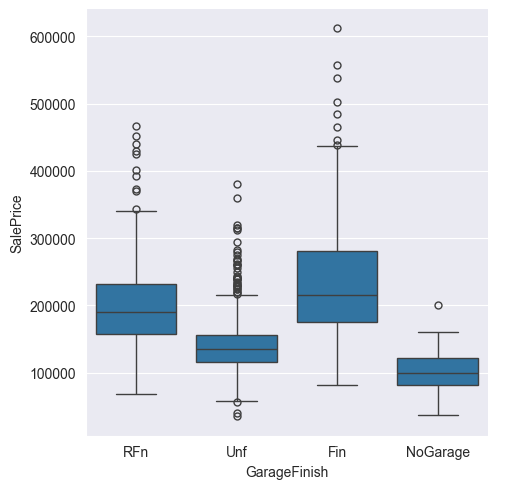

In [214]:
data.fillna({'GarageFinish' : 'NoGarage'}, inplace=True)
test_data.fillna({'GarageFinish' : 'NoGarage'}, inplace=True)
sns.catplot(x='GarageFinish', y='SalePrice', data=data, kind='box')

In [215]:
data["GarageQual"].unique()

array(['TA', 'Fa', 'Gd', nan, 'Po', 'Ex'], dtype=object)

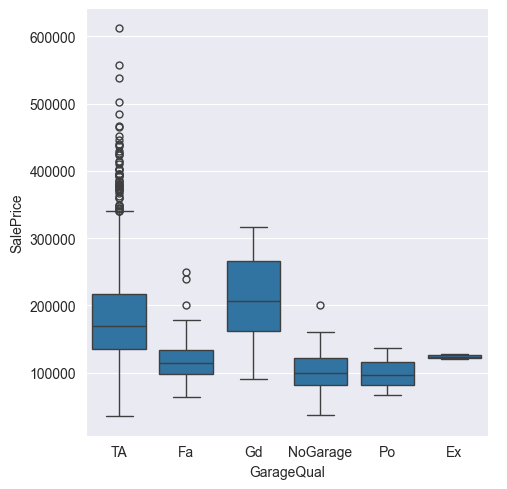

In [216]:
data.fillna({'GarageQual' : 'NoGarage'}, inplace=True)
test_data.fillna({'GarageQual' : 'NoGarage'}, inplace=True)
sns.catplot(x='GarageQual', y='SalePrice', data=data, kind='box')

In [217]:
data["BsmtFinType2"].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

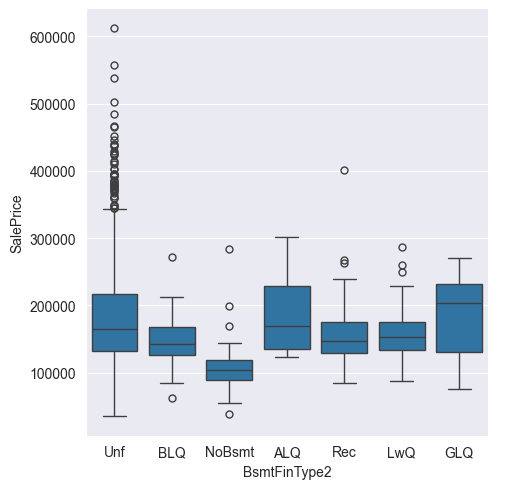

In [218]:
data.fillna({'BsmtFinType2' : 'NoBsmt'}, inplace=True)
test_data.fillna({'BsmtFinType2' : 'NoBsmt'}, inplace=True)
sns.catplot(x='BsmtFinType2', y='SalePrice', data=data, kind='box')

In [219]:
data["BsmtExposure"].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

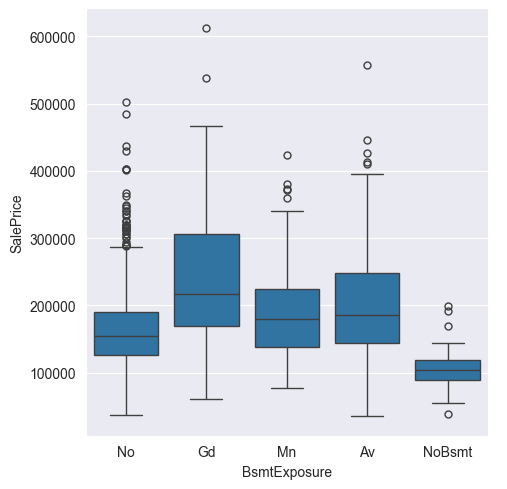

In [220]:
data.fillna({'BsmtExposure' : 'NoBsmt'}, inplace=True)
test_data.fillna({'BsmtExposure' : 'NoBsmt'}, inplace=True)
sns.catplot(x='BsmtExposure', y='SalePrice', data=data, kind='box')

In [221]:
data["BsmtQual"].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

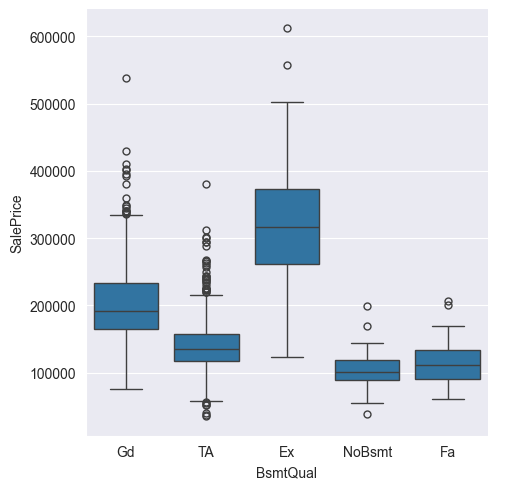

In [222]:
data.fillna({'BsmtQual' : 'NoBsmt'}, inplace=True)
test_data.fillna({'BsmtQual' : 'NoBsmt'}, inplace=True)
sns.catplot(x='BsmtQual', y='SalePrice', data=data, kind='box')

In [223]:
data["BsmtCond"].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

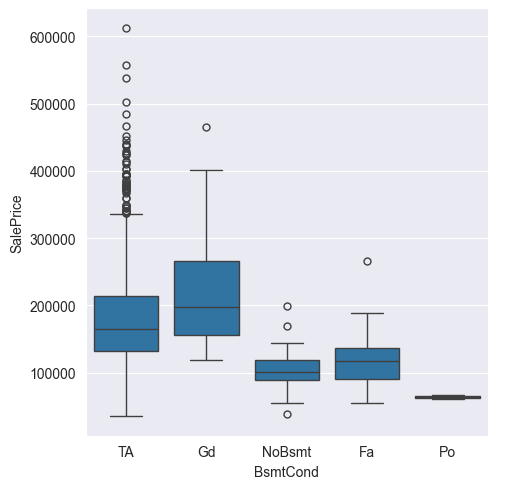

In [224]:
data.fillna({'BsmtCond' : 'NoBsmt'}, inplace=True)
test_data.fillna({'BsmtCond' : 'NoBsmt'}, inplace=True)
sns.catplot(x='BsmtCond', y='SalePrice', data=data, kind='box')

In [225]:
data["BsmtFinType1"].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

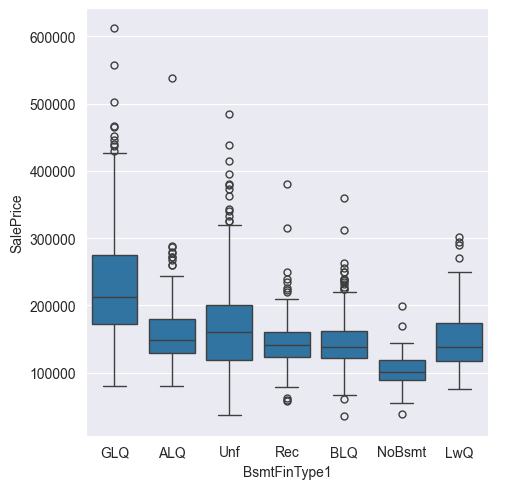

In [226]:
data.fillna({'BsmtFinType1' : 'NoBsmt'}, inplace=True)
test_data.fillna({'BsmtFinType1' : 'NoBsmt'}, inplace=True)
sns.catplot(x='BsmtFinType1', y='SalePrice', data=data, kind='box')

In [227]:
data["MasVnrArea"].unique()

array([1.960e+02, 0.000e+00, 1.620e+02, 3.500e+02, 1.860e+02, 2.400e+02,
       2.860e+02, 3.060e+02, 2.120e+02, 1.800e+02, 3.800e+02, 2.810e+02,
       6.400e+02, 2.000e+02, 2.460e+02, 1.320e+02, 6.500e+02, 1.010e+02,
       4.120e+02, 2.720e+02, 4.560e+02, 1.031e+03, 1.780e+02, 5.730e+02,
       3.440e+02, 2.870e+02, 1.670e+02, 1.115e+03, 4.000e+01, 1.040e+02,
       5.760e+02, 4.430e+02, 4.680e+02, 6.600e+01, 2.200e+01, 2.840e+02,
       7.600e+01, 2.030e+02, 6.800e+01, 1.830e+02, 4.800e+01, 2.800e+01,
       3.360e+02, 6.000e+02, 7.680e+02, 4.800e+02, 2.200e+02, 1.840e+02,
       1.129e+03, 1.160e+02, 1.350e+02, 2.660e+02, 8.500e+01, 3.090e+02,
       1.360e+02, 2.880e+02, 7.000e+01, 3.200e+02, 5.000e+01, 1.200e+02,
       4.360e+02, 2.520e+02, 8.400e+01, 6.640e+02, 2.260e+02, 3.000e+02,
       6.530e+02, 1.120e+02, 4.910e+02, 2.680e+02, 7.480e+02, 9.800e+01,
       2.750e+02, 1.380e+02, 2.050e+02, 2.620e+02, 1.280e+02, 2.600e+02,
       1.530e+02, 6.400e+01, 3.120e+02, 1.600e+01, 

In [228]:
data["Electrical"].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

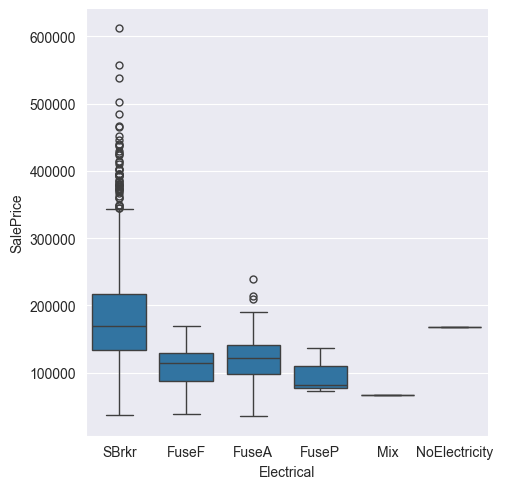

In [229]:
data.fillna({'Electrical' : 'NoElectricity'}, inplace=True)
test_data.fillna({'Electrical' : 'NoElectricity'}, inplace=True)
sns.catplot(x='Electrical', y='SalePrice', data=data, kind='box') 

In [230]:
# drop la PoolQc, MiscFeature, Fence, Alley
data.drop(columns=['PoolQC', 'MiscFeature', 'Fence', 'Alley'], inplace=True)
test_data.drop(columns=['PoolQC', 'MiscFeature', 'Fence', 'Alley'], inplace=True)
# drop la GarageYrBlt, GarageCond, GarageType, BasementFinType2
data.drop(columns=['GarageYrBlt', 'GarageCond', 'GarageType', 'BsmtFinType2'], inplace=True)
test_data.drop(columns=['GarageYrBlt', 'GarageCond', 'GarageType', 'BsmtFinType2'], inplace=True)

In [231]:
# afisam coloanele 
pd.DataFrame(data.columns)

,0
0,Id
1,MSSubClass
2,MSZoning
3,LotFrontage
4,LotArea
...,...
68,MoSold
69,YrSold
70,SaleType
71,SaleCondition


In [232]:
#feature engineering
data['TotalSF'] = data['BsmtFinSF1'] + data['BsmtFinSF2'] + data['1stFlrSF'] + data['2ndFlrSF']
test_data['TotalSF'] = test_data['BsmtFinSF1'] + test_data['BsmtFinSF2'] + test_data['1stFlrSF'] + test_data['2ndFlrSF']

In [233]:
data['HouseAge'] = data['YrSold'] - data['YearBuilt']
test_data['HouseAge'] = test_data['YrSold'] - test_data['YearBuilt']

In [234]:
data['RemodAge'] = data['YrSold'] - data['YearRemodAdd']
test_data['RemodAge'] = test_data['YrSold'] - test_data['YearRemodAdd']

In [235]:
data['TotalArea'] = data['GrLivArea'] + data['GarageArea'] + data['TotalBsmtSF']
test_data['TotalArea'] = test_data['GrLivArea'] + test_data['GarageArea'] + test_data['TotalBsmtSF']

In [236]:
data['TotalBaths'] = data['FullBath'] + data['HalfBath'] * 0.5 + data['BsmtFullBath'] + data['BsmtHalfBath'] * 0.5
test_data['TotalBaths'] = test_data['FullBath'] + test_data['HalfBath'] * 0.5 + test_data['BsmtFullBath'] + test_data['BsmtHalfBath'] * 0.5

In [237]:
data['TotalPorchSF'] = data['OpenPorchSF'] + data['EnclosedPorch'] + data['3SsnPorch'] + data['ScreenPorch']
test_data['TotalPorchSF'] = test_data['OpenPorchSF'] + test_data['EnclosedPorch'] + test_data['3SsnPorch'] + test_data['ScreenPorch']

In [238]:
data.drop(columns=['BsmtFinSF1', 'BsmtFinSF2', '1stFlrSF', '2ndFlrSF', 'YrSold', 'YearBuilt', 'YearRemodAdd', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'], inplace=True)
test_data.drop(columns=['BsmtFinSF1', 'BsmtFinSF2', '1stFlrSF', '2ndFlrSF', 'YrSold', 'YearBuilt', 'YearRemodAdd', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'], inplace=True)

In [239]:
# dam drop si la id
data.drop(columns=['Id'], inplace=True)
test_data.drop(columns=['Id'], inplace=True)

In [240]:
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtUnfSF',
 'LowQualFinSF',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'SalePrice',
 'TotalSF',
 'HouseAge',
 'RemodAge',
 'TotalArea',
 'TotalBaths',
 'TotalPorchSF']

<Axes: >

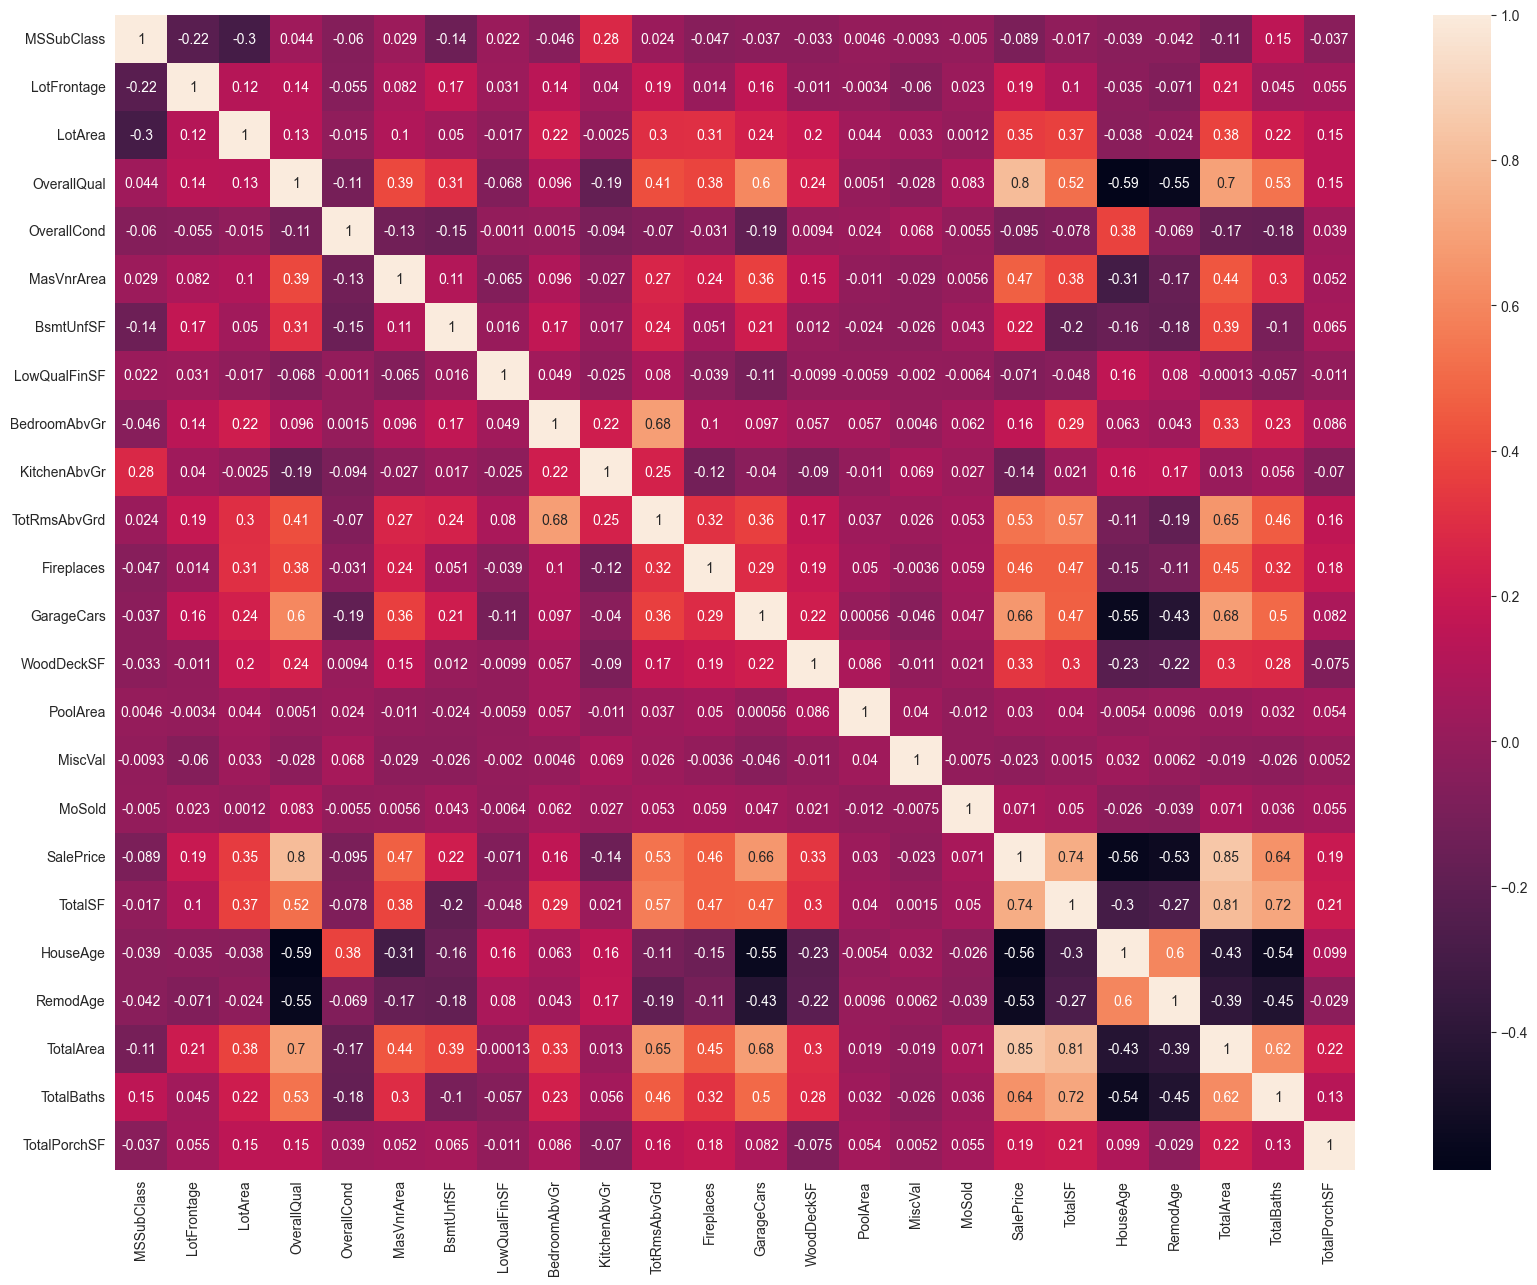

In [241]:
corelation = data.corr(numeric_only=True)
plt.figure(figsize=(20, 15))
sns.heatmap(corelation, annot=True)

<Axes: xlabel='SalePrice', ylabel='Count'>

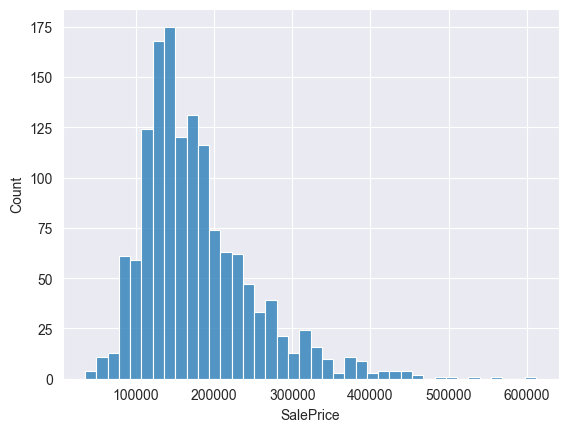

In [242]:
sns.histplot(data['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Count'>

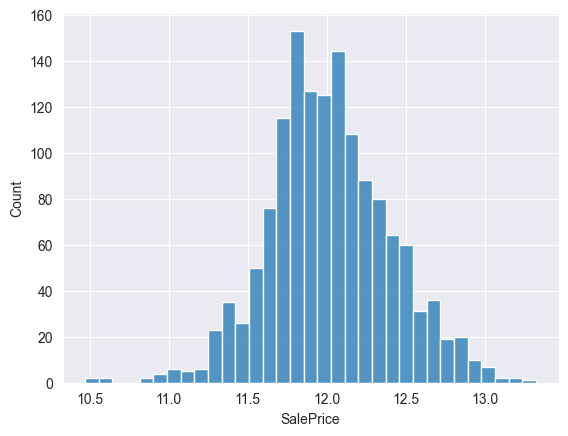

In [243]:
# logarimam sale price
data['SalePrice'] = np.log1p(data['SalePrice'])
sns.histplot(data['SalePrice'])

In [244]:
#afisam coloanele object
data.dtypes[data.dtypes == 'object']

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageFinish     object
GarageQual       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [245]:
 numeric_cols.remove('SalePrice')

In [246]:
numeric_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtUnfSF',
 'LowQualFinSF',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'TotalSF',
 'HouseAge',
 'RemodAge',
 'TotalArea',
 'TotalBaths',
 'TotalPorchSF']

In [247]:
ode_cols =['LotShape', 'LandContour', 'Utilities', 'LandSlope', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'Heating' , 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'PavedDrive', 'ExterQual' ]


ohe_cols =['MSZoning', 'Street','Condition1', 'Condition2', 'BldgType' ,'LotConfig', 'Neighborhood' , 'RoofStyle', 'MasVnrType',  'SaleType', 'SaleCondition', 'HouseStyle']


In [248]:
# One hot encoding
data = pd.get_dummies(data, columns=ohe_cols)
test_data = pd.get_dummies(test_data, columns=ohe_cols)

In [330]:
datacopy = data.copy()
test_datacopy = test_data.copy()

In [252]:
test_data.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,RoofMatl,...,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,20,80.0,11622,Reg,Lvl,AllPub,Gtl,5,6,CompShg,...,False,True,False,False,False,True,False,False,False,False
1,20,81.0,14267,IR1,Lvl,AllPub,Gtl,6,6,CompShg,...,False,True,False,False,False,True,False,False,False,False
2,60,74.0,13830,IR1,Lvl,AllPub,Gtl,5,5,CompShg,...,False,True,False,False,False,False,False,True,False,False
3,60,78.0,9978,IR1,Lvl,AllPub,Gtl,6,6,CompShg,...,False,True,False,False,False,False,False,True,False,False
4,120,43.0,5005,IR1,HLS,AllPub,Gtl,8,5,CompShg,...,False,True,False,False,False,True,False,False,False,False


In [348]:
test_data['TotalBaths'].fillna(0, inplace=True)
test_data['Functional'].fillna('Sal', inplace=True)
test_data['TotalArea'].fillna(0, inplace=True)
test_data['Utilities'].fillna('ELO', inplace=True)
test_data['GarageCars'].fillna(0, inplace=True)
test_data['KitchenQual'].fillna('NoKitchen', inplace=True)
test_data['BsmtUnfSF'].fillna(0, inplace=True)
test_data['Exterior1st'].fillna('NoExterior', inplace=True)
test_data['Exterior2nd'].fillna('NoExterior', inplace=True)
test_data['TotalArea'].fillna(0, inplace=True)
test_data['TotalBaths'].fillna(0, inplace=True)
test_data['TotalSF'].fillna(0, inplace=True)

C:\Users\david\AppData\Local\Temp\ipykernel_20156\171937758.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['TotalBaths'].fillna(0, inplace=True)
C:\Users\david\AppData\Local\Temp\ipykernel_20156\171937758.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [332]:
data = datacopy.copy()
test_data = test_datacopy.copy()

In [333]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent', fill_value='missing')
data[ode_cols] = imputer.fit_transform(data[ode_cols])
test_data[ode_cols] = imputer.transform(test_data[ode_cols])

In [334]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
data[ode_cols] = encoder.fit_transform(data[ode_cols])
test_data[ode_cols] = encoder.transform(test_data[ode_cols])

In [335]:
test_data.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,RoofMatl,...,SaleCondition_Partial,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Condition2_PosA
0,20,80.0,11622,3.0,3.0,0.0,0.0,5,6,0.0,...,False,False,False,True,0,False,False,False,False,False
1,20,81.0,14267,0.0,3.0,0.0,0.0,6,6,0.0,...,False,False,False,True,0,False,False,False,False,False
2,60,74.0,13830,0.0,3.0,0.0,0.0,5,5,0.0,...,False,False,False,False,0,False,True,False,False,False
3,60,78.0,9978,0.0,3.0,0.0,0.0,6,6,0.0,...,False,False,False,False,0,False,True,False,False,False
4,120,43.0,5005,0.0,1.0,0.0,0.0,8,5,0.0,...,False,False,False,True,0,False,False,False,False,False


In [340]:
# verificam daca coloanele corespund in test_data si data
data_col = data.columns.tolist()
test_data_col = test_data.columns.tolist()
for col in data_col:
    if col not in test_data_col:
        print(col)

SalePrice


In [337]:
data[('HouseStyle_2.5Fin')].unique()

array([False,  True])

In [338]:
# data are coloanele 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'HouseStyle_2.5Fin'
# adaugam acest coloane in test_data cu valoarea 0
test_data['Condition2_RRAe'] = 0
test_data['Condition2_RRAn'] = 0
test_data['Condition2_RRNn'] = 0
test_data['HouseStyle_2.5Fin'] = 0

In [339]:
data['Condition2_PosA'] = 0

In [341]:
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [342]:
# verificam daca X are Nan
X.isnull().sum().sort_values(ascending=False)

MSSubClass              0
Neighborhood_NoRidge    0
Neighborhood_IDOTRR     0
Neighborhood_MeadowV    0
Neighborhood_Mitchel    0
                       ..
MoSold                  0
MiscVal                 0
PoolArea                0
WoodDeckSF              0
Condition2_PosA         0
Length: 139, dtype: int64

In [343]:
linearReg = LinearRegression()
linearReg.fit(X_train, y_train)
linearReg.predict(X_test)
error = np.sqrt(metrics.mean_squared_error(y_test, linearReg.predict(X_test)))
error

0.12358494359053994

In [344]:
# verificam daca coloanele corespund in test_data si data
data_col = data.columns.tolist()
test_data_col = test_data.columns.tolist()
for col in data_col:
    if col not in test_data_col:
        print(col)

SalePrice


In [345]:
# punem coloanele in aceeasi ordine
data_col.remove('SalePrice')
test_data = test_data[data_col]

In [349]:
test_data.isnull().sum().sort_values(ascending=False)

MSSubClass              0
Neighborhood_NoRidge    0
Neighborhood_IDOTRR     0
Neighborhood_MeadowV    0
Neighborhood_Mitchel    0
                       ..
MoSold                  0
MiscVal                 0
PoolArea                0
WoodDeckSF              0
Condition2_PosA         0
Length: 139, dtype: int64

In [350]:
predictions = linearReg.predict(test_data)
predictions

array([11.68649856, 11.95038614, 12.11155799, ..., 11.98220226,
       11.69902497, 12.31095072])

In [351]:
predictions = np.expm1(predictions)


In [352]:
predictions

array([118953.7637286 , 154875.93920577, 181961.87941036, ...,
       159882.7485186 , 120453.21144147, 222114.03968421])

In [353]:
# submission porneste de la 1461
submission = pd.DataFrame({'Id': range(1461, 2920), 'SalePrice': predictions})
submission.to_csv('submission6.csv', index=False)

In [354]:
# model pentru random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf.predict(X_test)
error = np.sqrt(metrics.mean_squared_error(y_test, rf.predict(X_test)))
error

0.1353701067296572

In [356]:
predictions = rf.predict(test_data)
predictions = np.expm1(predictions)
submission = pd.DataFrame({'Id': range(1461, 2920), 'SalePrice': predictions})
submission.to_csv('submission7.csv', index=False)

In [358]:
rf2 = RandomForestRegressor(random_state=13)
param_grid_rf = {
    'n_estimators': [100, 250, 500],
    'max_depth': [5, 10, 15],
    'min_samples_split': [3, 5, 10],
}

In [359]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV
rfr_cv = GridSearchCV(rf2, param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [360]:
rfr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=13), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [3, 5, 10],
                         'n_estimators': [100, 250, 500]},
             scoring='neg_mean_squared_error')

In [361]:
predictions_rf = rfr_cv.predict(test_data)

In [362]:
# facem fisier
predictions_rf = np.expm1(predictions_rf)
submission = pd.DataFrame({'Id': range(1461, 2920), 'SalePrice': predictions_rf})
submission.to_csv('submission8.csv', index=False)

In [365]:
# importam XGBRegressor
from xgboost import XGBRegressor
XGB = XGBRegressor(random_state=13)

In [366]:
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [300],
    'max_depth': [3],
    'min_child_weight': [1,2,3],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

In [368]:
xgb_cv = GridSearchCV(XGB, param_grid_xgb, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

In [369]:
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=13, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3],
                         'min_child_weight': [1, 2, 3], 'n_estimators': [300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='neg_mean_squared_error')

In [371]:
np.sqrt(metrics.mean_squared_error(y_test, xgb_cv.predict(X_test)))

0.12328787342571135

In [370]:
predictions_xgb = xgb_cv.predict(test_data)

In [372]:
# facem fisiere
predictions_xgb = np.expm1(predictions_xgb)
submission = pd.DataFrame({'Id': range(1461, 2920), 'SalePrice': predictions_xgb})
submission.to_csv('submission9.csv', index=False)